In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Importing libraries**

In [ ]:
!pip install autoviz          # for automatic visualization of any dataset with just one line of code. 
!pip install -U --pre pycaret # for regression models comparison

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from autoviz.classify_method import data_cleaning_suggestions ,data_suggestions
from pycaret  import regression
from sklearn.model_selection import cross_val_score

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Engineering_graduate_salary.csv', delimiter=",")

In [8]:
data.head()

ID Gender         DOB  10percentage                       10board  \
0  604399      f  1990-10-22         87.80                          cbse   
1  988334      m  1990-05-15         57.00                          cbse   
2  301647      m  1989-08-21         77.33  maharashtra state board,pune   
3  582313      m  1991-05-04         84.30                          cbse   
4  339001      f  1990-10-30         82.00                          cbse   

   12graduation  12percentage                    12board  CollegeID  \
0          2009         84.00                       cbse       6920   
1          2010         64.50                       cbse       6624   
2          2007         85.17  amravati divisional board       9084   
3          2009         86.00                       cbse       8195   
4          2008         75.00                       cbse       4889   

   CollegeTier  ... MechanicalEngg ElectricalEngg  TelecomEngg  CivilEngg  \
0            1  ...             -1             -1           -1         -1   
1            2  ...             -1             -1           -1         -1   
2            2  ...             -1             -1          260         -1   
3            1  ...             -1             -1           -1         -1   
4            2  ...             -1             -1           -1         -1   

   conscientiousness agreeableness  extraversion  nueroticism  \
0            -0.1590        0.3789        1.2396      0.14590   
1             1.1336        0.0459        1.2396      0.52620   
2             0.5100       -0.1232        1.5428     -0.29020   
3            -0.4463        0.2124        0.3174      0.27270   
4            -1.4992       -0.7473       -1.0697      0.06223   

   openess_to_experience  Salary  
0                 0.2889  445000  
1                -0.2859  110000  
2                -0.2875  255000  
3                 0.4805  420000  
4                 0.1864  200000  

[5 rows x 34 columns]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [11]:
data.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

In [10]:
data.describe()

ID  10percentage  12graduation  12percentage     CollegeID  \
count  2.998000e+03   2998.000000   2998.000000   2998.000000   2998.000000   
mean   6.648926e+05     77.666264   2008.080720     74.341061   5210.210807   
std    3.648951e+05     10.002785      1.631814     11.120299   4776.609877   
min    1.124400e+04     43.000000   1998.000000     40.000000      2.000000   
25%    3.334648e+05     71.140000   2007.000000     66.000000    526.250000   
50%    6.396945e+05     78.965000   2008.000000     74.000000   4027.500000   
75%    9.951770e+05     85.600000   2009.000000     82.600000   8822.250000   
max    1.297877e+06     97.760000   2012.000000     98.700000  18409.000000   

       CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count  2998.000000  2998.000000    2998.000000      2998.000000   
mean      1.924616    71.509857    5210.210807         0.296197   
std       0.264053     8.122462    4776.609877         0.456655   
min       1.000000     6.630000       2.000000         0.000000   
25%       2.000000    66.530000     526.250000         0.000000   
50%       2.000000    71.800000    4027.500000         0.000000   
75%       2.000000    76.300000    8822.250000         1.000000   
max       2.000000    99.930000   18409.000000         1.000000   

       GraduationYear  ...  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count     2998.000000  ...     2998.000000     2998.000000  2998.000000   
mean      2011.939960  ...       24.138759       16.267845    31.068379   
std         36.780582  ...       99.785138       86.054739   103.552963   
min          0.000000  ...       -1.000000       -1.000000    -1.000000   
25%       2012.000000  ...       -1.000000       -1.000000    -1.000000   
50%       2013.000000  ...       -1.000000       -1.000000    -1.000000   
75%       2014.000000  ...       -1.000000       -1.000000    -1.000000   
max       2017.000000  ...      623.000000      660.000000   548.000000   

         CivilEngg  conscientiousness  agreeableness  extraversion  \
count  2998.000000        2998.000000    2998.000000   2998.000000   
mean      1.946965          -0.038714       0.126217     -0.008662   
std      32.241501           1.024974       0.955831      0.962695   
min      -1.000000          -3.893300      -5.781600     -4.600900   
25%      -1.000000          -0.649100      -0.435300     -0.604800   
50%      -1.000000           0.046400       0.212400      0.091400   
75%      -1.000000           0.702700       0.812800      0.672000   
max     500.000000           1.995300       1.904800      2.161700   

       nueroticism  openess_to_experience        Salary  
count  2998.000000            2998.000000  2.998000e+03  
mean     -0.145965              -0.141111  3.051748e+05  
std       1.012901               1.007134  2.123312e+05  
min      -2.643000              -7.375700  3.500000e+04  
25%      -0.868200              -0.669200  1.800000e+05  
50%      -0.172700              -0.094300  3.000000e+05  
75%       0.526200               0.502400  3.700000e+05  
max       3.352500               1.630200  4.000000e+06  

[8 rows x 27 columns]

#**Data cleaning**


In [89]:
data_cleaning_suggestions(data)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


In [12]:
# These columns are not way useful in prediction, because they won't affect the salary
data.drop(['ID','DOB','CollegeID','12graduation','10board','12board','CollegeState','CollegeCityID','CollegeCityTier','GraduationYear'], axis=1, inplace=True)


In [15]:
duplicate = data[data.duplicated()]
duplicate                           # No duplicates

Empty DataFrame
Columns: [Gender, 10percentage, 12percentage, CollegeTier, Degree, Specialization, collegeGPA, English, Logical, Quant, Domain, ComputerProgramming, ElectronicsAndSemicon, ComputerScience, MechanicalEngg, ElectricalEngg, TelecomEngg, CivilEngg, conscientiousness, agreeableness, extraversion, nueroticism, openess_to_experience, Salary]
Index: []

[0 rows x 24 columns]

In [17]:
df = data.drop_duplicates()
df.shape 
data = data.drop_duplicates()

In [26]:
data.dropna(inplace=True)

In [27]:
data.Degree.value_counts()  # checking counts of each degree

B.Tech/B.E.      2757
MCA               200
M.Tech./M.E.       40
M.Sc. (Tech.)       1
Name: Degree, dtype: int64

In [28]:
specialization = data.Specialization.value_counts()
specialization

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
OTHERS                                          76
electrical engineering                          63
electronics & instrumentation eng               24
electronics and instrumentation engineering     18
instrumentation and control engineering         18
information science engineering                 18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
Name: Specialization, dtype: int64

In [29]:
# seeing specialization there are many specializations which have 1 row, 
# so combining these many individual specializations into one increases performance
specializationlessthan10 = specialization[specialization<=10]
specializationlessthan10

Series([], Name: Specialization, dtype: int64)

In [30]:
def removespecialessthan10(value):
    if value in specializationlessthan10:
        return 'OTHERS'
    else:
        return value

data.Specialization = data.Specialization.apply(removespecialessthan10)
data.Specialization.value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
OTHERS                                          76
electrical engineering                          63
electronics & instrumentation eng               24
electronics and instrumentation engineering     18
instrumentation and control engineering         18
information science engineering                 18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
Name: Specialization, dtype: int64

In [31]:
# working with GPA

data.collegeGPA.value_counts()

72.00    85
70.00    75
75.00    67
65.00    63
76.00    57
         ..
78.36     1
72.25     1
65.47     1
72.90     1
73.19     1
Name: collegeGPA, Length: 1064, dtype: int64

#**Data Visualization**

In [33]:
# As there are many values in GPA column, so we try to plot graphs so that we can see outliers and visualise more
data

Gender  10percentage  12percentage  CollegeTier       Degree  \
0         f         87.80         84.00            1  B.Tech/B.E.   
1         m         57.00         64.50            2  B.Tech/B.E.   
2         m         77.33         85.17            2  B.Tech/B.E.   
3         m         84.30         86.00            1  B.Tech/B.E.   
4         f         82.00         75.00            2  B.Tech/B.E.   
...     ...           ...           ...          ...          ...   
2993      f         75.00         73.00            2  B.Tech/B.E.   
2994      f         84.00         77.00            2  B.Tech/B.E.   
2995      m         91.40         65.56            2  B.Tech/B.E.   
2996      m         88.64         65.16            2  B.Tech/B.E.   
2997      m         77.00         75.50            2  B.Tech/B.E.   

                                 Specialization  collegeGPA  English  Logical  \
0       instrumentation and control engineering       73.82      650      665   
1                computer science & engineering       65.00      440      435   
2              electronics & telecommunications       61.94      485      475   
3                computer science & engineering       80.40      675      620   
4                                 biotechnology       64.30      575      495   
...                                         ...         ...      ...      ...   
2993  electronics and communication engineering       70.00      505      485   
2994                     information technology       75.20      345      585   
2995                     information technology       73.19      385      425   
2996                       computer engineering       74.81      465      645   
2997                     information technology       69.30      370      390   

      Quant  ...  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0       810  ...              -1              -1           -1         -1   
1       210  ...              -1              -1           -1         -1   
2       505  ...              -1              -1          260         -1   
3       635  ...              -1              -1           -1         -1   
4       365  ...              -1              -1           -1         -1   
...     ...  ...             ...             ...          ...        ...   
2993    445  ...              -1              -1           -1         -1   
2994    395  ...              -1              -1           -1         -1   
2995    485  ...              -1              -1           -1         -1   
2996    505  ...              -1              -1           -1         -1   
2997    285  ...              -1              -1           -1         -1   

      conscientiousness  agreeableness  extraversion  nueroticism  \
0               -0.1590         0.3789        1.2396      0.14590   
1                1.1336         0.0459        1.2396      0.52620   
2                0.5100        -0.1232        1.5428     -0.29020   
3               -0.4463         0.2124        0.3174      0.27270   
4               -1.4992        -0.7473       -1.0697      0.06223   
...                 ...            ...           ...          ...   
2993            -1.1901         0.9688       -1.0697      1.35490   
2994            -0.1082         0.0328       -0.4891     -0.29020   
2995            -0.8810         0.1888       -0.3440      0.06230   
2996             1.4374         1.2808       -0.4891     -1.46537   
2997            -0.5899        -1.9521        0.3174      1.16010   

      openess_to_experience  Salary  
0                    0.2889  445000  
1                   -0.2859  110000  
2                   -0.2875  255000  
3                    0.4805  420000  
4                    0.1864  200000  
...                     ...     ...  
2993                 0.0284  120000  
2994                 0.5024  120000  
2995                 0.6603  385000  
2996                 0.5419  530000  
2997                -2.3937  200000  

[299

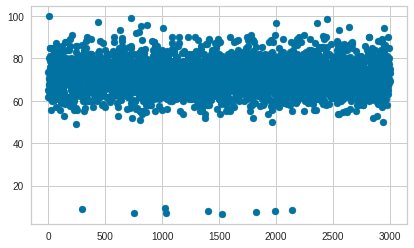

In [36]:
plt.scatter(df.index, df.collegeGPA)

In [38]:
# As there are some outliers in the collegeGPA column, removing all rows where collegeGPA 
# is less than or equal to 40. This will help the model to perform better

data = data[(data['collegeGPA'] > 40)]  # so considering columns only > 40
data.shape

(2989, 24)

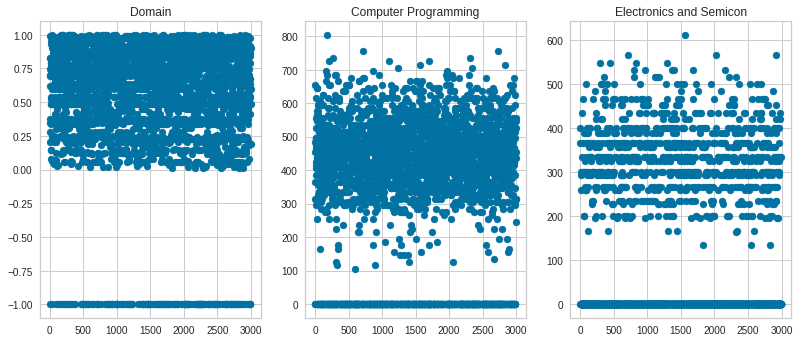

In [40]:
# visualising domain, computer programming, Electronics and Semicon cols
plt.figure(figsize = (12,12))

plt.subplot(2,3,1)
plt.scatter(data.index, data.Domain)
plt.title('Domain')

plt.subplot(2,3,2)
plt.scatter(data.index, data.ComputerProgramming)
plt.title('Computer Programming')

plt.subplot(2,3,3)
plt.scatter(data.index, data.ElectronicsAndSemicon)
plt.title('Electronics and Semicon')

plt.show()

In [41]:
data.describe()

10percentage  12percentage  CollegeTier   collegeGPA      English  \
count   2989.000000   2989.000000  2989.000000  2989.000000  2989.000000   
mean      77.666243     74.326193     1.925059    71.701435   501.136501   
std        9.995087     11.122409     0.263341     7.344428   105.368214   
min       43.000000     40.000000     1.000000    49.070000   180.000000   
25%       71.170000     66.000000     2.000000    66.600000   425.000000   
50%       78.930000     74.000000     2.000000    71.820000   500.000000   
75%       85.600000     82.600000     2.000000    76.300000   570.000000   
max       97.760000     98.700000     2.000000    99.930000   875.000000   

           Logical        Quant       Domain  ComputerProgramming  \
count  2989.000000  2989.000000  2989.000000          2989.000000   
mean    500.524925   514.153898     0.507995           352.079291   
std      87.125537   122.021542     0.463786           204.350796   
min     195.000000   120.000000    -1.000000            -1.000000   
25%     445.000000   430.000000     0.342315           295.000000   
50%     505.000000   515.000000     0.622643           415.000000   
75%     565.000000   595.000000     0.837621           495.000000   
max     795.000000   900.000000     0.999910           804.000000   

       ElectronicsAndSemicon  ...  MechanicalEngg  ElectricalEngg  \
count            2989.000000  ...     2989.000000     2989.000000   
mean               96.398126  ...       23.622951       16.319839   
std               158.820256  ...       98.747586       86.179015   
min                -1.000000  ...       -1.000000       -1.000000   
25%                -1.000000  ...       -1.000000       -1.000000   
50%                -1.000000  ...       -1.000000       -1.000000   
75%               260.000000  ...       -1.000000       -1.000000   
max               612.000000  ...      623.000000      660.000000   

       TelecomEngg    CivilEngg  conscientiousness  agreeableness  \
count  2989.000000  2989.000000        2989.000000    2989.000000   
mean     31.164938     1.868518          -0.039356       0.126508   
std     103.693819    31.942601           1.023408       0.955307   
min      -1.000000    -1.000000          -3.893300      -5.781600   
25%      -1.000000    -1.000000          -0.649100      -0.435300   
50%      -1.000000    -1.000000           0.046400       0.212400   
75%      -1.000000    -1.000000           0.702700       0.812800   
max     548.000000   500.000000           1.995300       1.904800   

       extraversion  nueroticism  openess_to_experience        Salary  
count   2989.000000  2989.000000            2989.000000  2.989000e+03  
mean      -0.008160    -0.145802              -0.141227  3.050867e+05  
std        0.963157     1.012695               1.007638  2.123479e+05  
min       -4.600900    -2.643000              -7.375700  3.500000e+04  
25%       -0.604800    -0.868200              -0.669200  1.800000e+05  
50%        0.091400    -0.172700              -0.094300  3.000000e+05  
75%        0.672000     0.526200               0.502400  3.700000e+05  
max        2.161700     3.352500               1.630200  4.000000e+06  

[8 rows x 21 columns]

In [42]:
# from the above scatter plots we can see some values are starting with -1 replacing -1 with null

data = data.replace(-1, np.nan)

In [50]:
data.isnull().any()

Gender                   False
10percentage             False
12percentage             False
CollegeTier              False
Degree                   False
Specialization           False
collegeGPA               False
English                  False
Logical                  False
Quant                    False
Domain                    True
ComputerProgramming       True
ElectronicsAndSemicon     True
ComputerScience           True
MechanicalEngg            True
ElectricalEngg            True
TelecomEngg               True
CivilEngg                 True
conscientiousness        False
agreeableness            False
extraversion             False
nueroticism              False
openess_to_experience    False
Salary                   False
dtype: bool

In [51]:
data.isnull().values.sum() > 0

True

In [54]:
# Filling null values with mean
# We could have directly filled -1 with mean but, we need to fill mean values pertaining to that column
# Hence, we now fill with NAN and then replacing them with mean column value

cols_with_nan = [col for col in df.columns if data.isna().sum()[col] > 0]

for column in cols_with_nan:
    data[column] = data[column].fillna(data[column].mean())

In [55]:
data.isnull().any()

Gender                   False
10percentage             False
12percentage             False
CollegeTier              False
Degree                   False
Specialization           False
collegeGPA               False
English                  False
Logical                  False
Quant                    False
Domain                   False
ComputerProgramming      False
ElectronicsAndSemicon    False
ComputerScience          False
MechanicalEngg           False
ElectricalEngg           False
TelecomEngg              False
CivilEngg                False
conscientiousness        False
agreeableness            False
extraversion             False
nueroticism              False
openess_to_experience    False
Salary                   False
dtype: bool

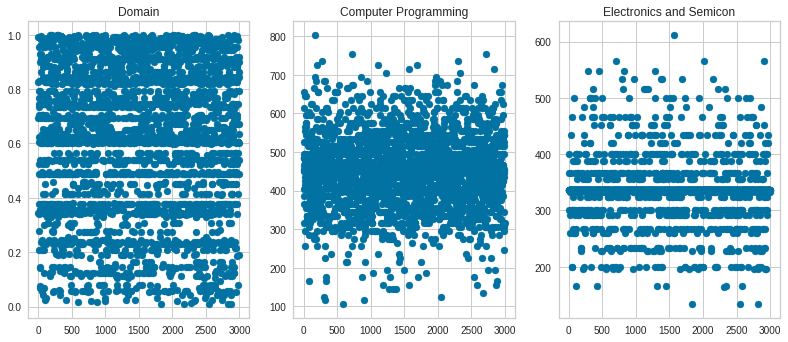

In [56]:
# visualising domain, computer programming, Electronics and Semicon cols
plt.figure(figsize = (12,12))

plt.subplot(2,3,1)
plt.scatter(data.index, data.Domain)
plt.title('Domain')

plt.subplot(2,3,2)
plt.scatter(data.index, data.ComputerProgramming)
plt.title('Computer Programming')

plt.subplot(2,3,3)
plt.scatter(data.index, data.ElectronicsAndSemicon)
plt.title('Electronics and Semicon')

plt.show()

<Axes: xlabel='Gender', ylabel='count'>

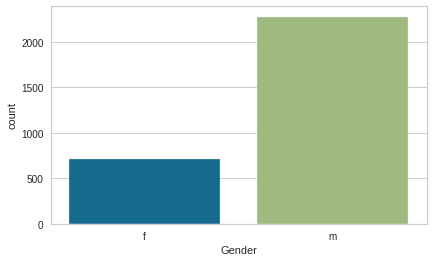

In [57]:
# Gender visualisation

data.Gender.value_counts()
sns.countplot(data=data, x=data.Gender)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'instrumentation and control engineering'),
  Text(1, 0, 'computer science & engineering'),
  Text(2, 0, 'electronics & telecommunications'),
  Text(3, 0, 'biotechnology'),
  Text(4, 0, 'mechanical engineering'),
  Text(5, 0, 'information technology'),
  Text(6, 0, 'electronics and communication engineering'),
  Text(7, 0, 'computer engineering'),
  Text(8, 0, 'computer application'),
  Text(9, 0, 'OTHERS'),
  Text(10, 0, 'electrical engineering'),
  Text(11, 0, 'electronics and electrical engineering'),
  Text(12, 0, 'information science engineering'),
  Text(13, 0, 'electronics & instrumentation eng'),
  Text(14, 0, 'electronics engineering'),
  Text(15, 0, 'electronics and instrumentation engineering'),
  Text(16, 0, 'civil engineering')])

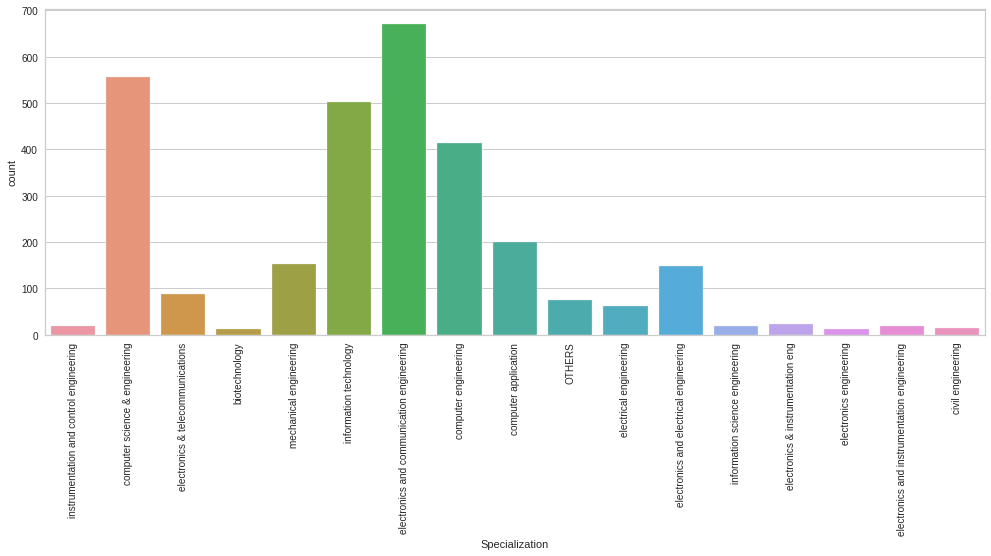

In [62]:
plt.figure(figsize=(15,6))
sns.countplot(data=data, x= data['Specialization'])
plt.xticks(rotation = 90)

<Axes: xlabel='collegeGPA', ylabel='Salary'>

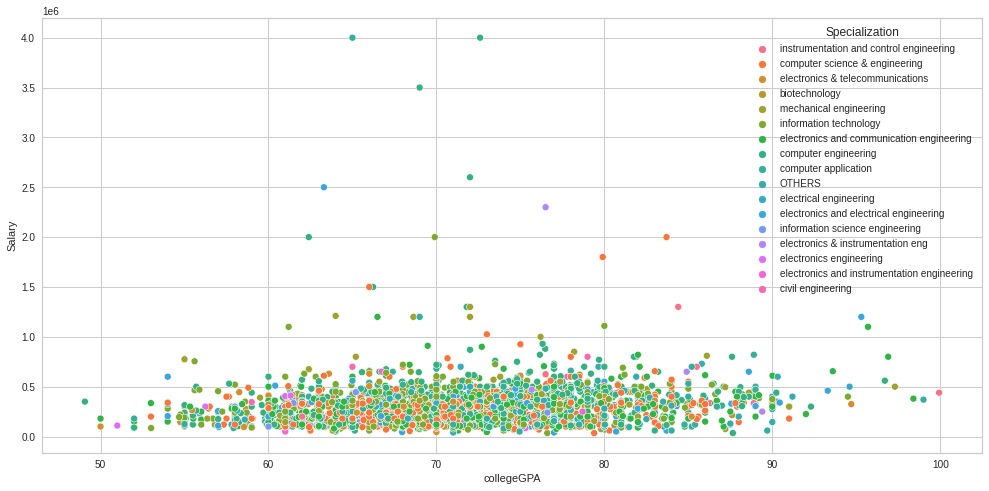

In [74]:
# plotting GPA vs Salary considering specialization

plt.figure(figsize=(15,8))
sns.scatterplot(data = data, x=data.collegeGPA, y=data.Salary, hue = data.Specialization)

# we can see mostly CSE, ICE, CE, ECE has more frequency

<Axes: xlabel='collegeGPA', ylabel='Salary'>

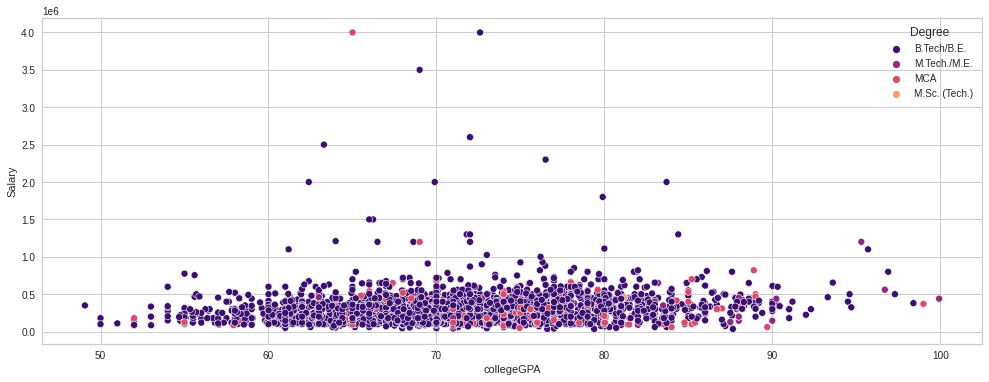

In [70]:
# plotting GPA vs Salary considering degree 

plt.figure(figsize=(15,6))
sns.scatterplot(data = data, x=data.collegeGPA, y=data.Salary, hue = data.Degree, palette ='magma')

<Axes: xlabel='openess_to_experience', ylabel='Salary'>

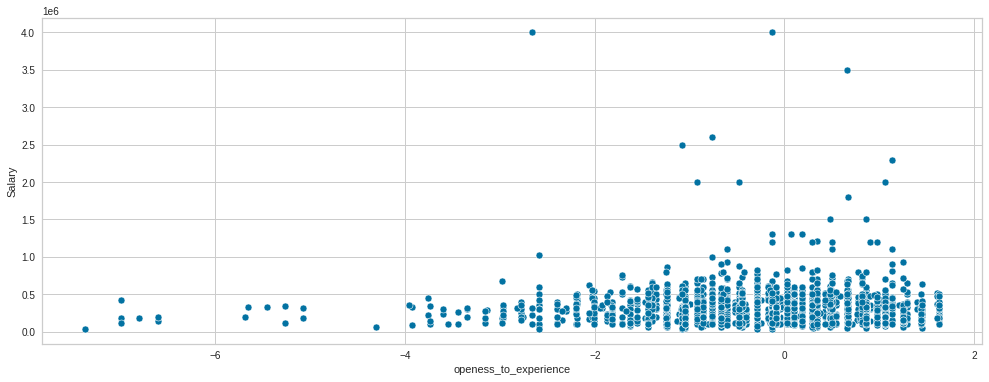

In [69]:
# Opeenness to experience vs salary

plt.figure(figsize=(15,6))
sns.scatterplot(data = data, x=data.openess_to_experience, y=data.Salary)

<Axes: >

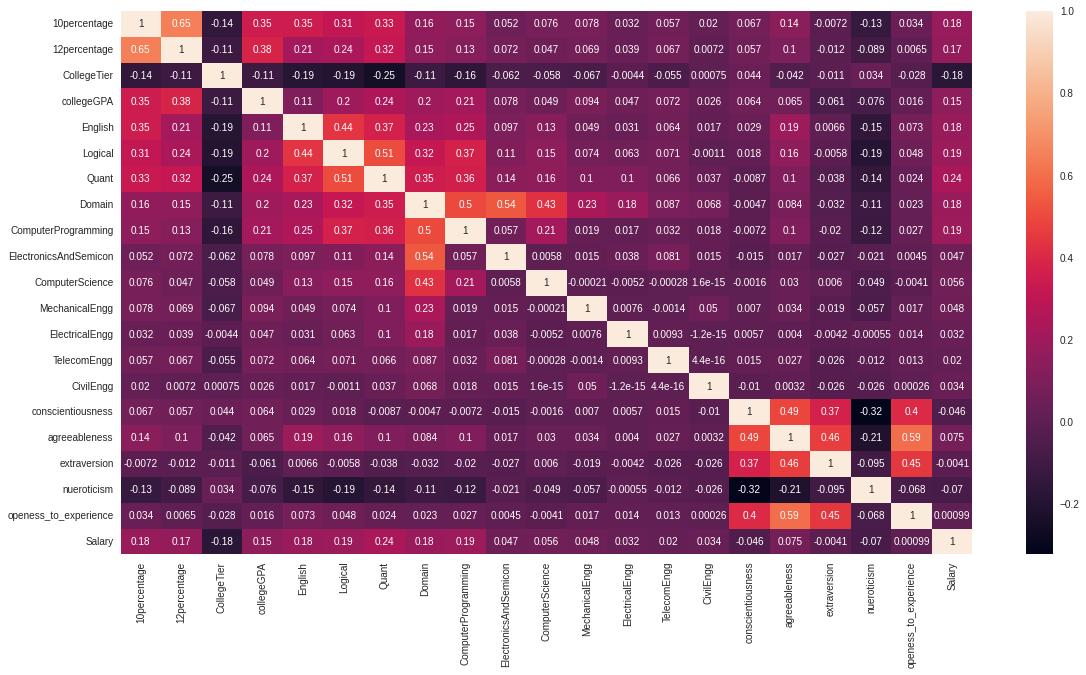

In [84]:
# this heatmap tells which values are mostly used(dark colored)
plt.figure(figsize=(17,10))
sns.heatmap(data.corr(), annot=True)

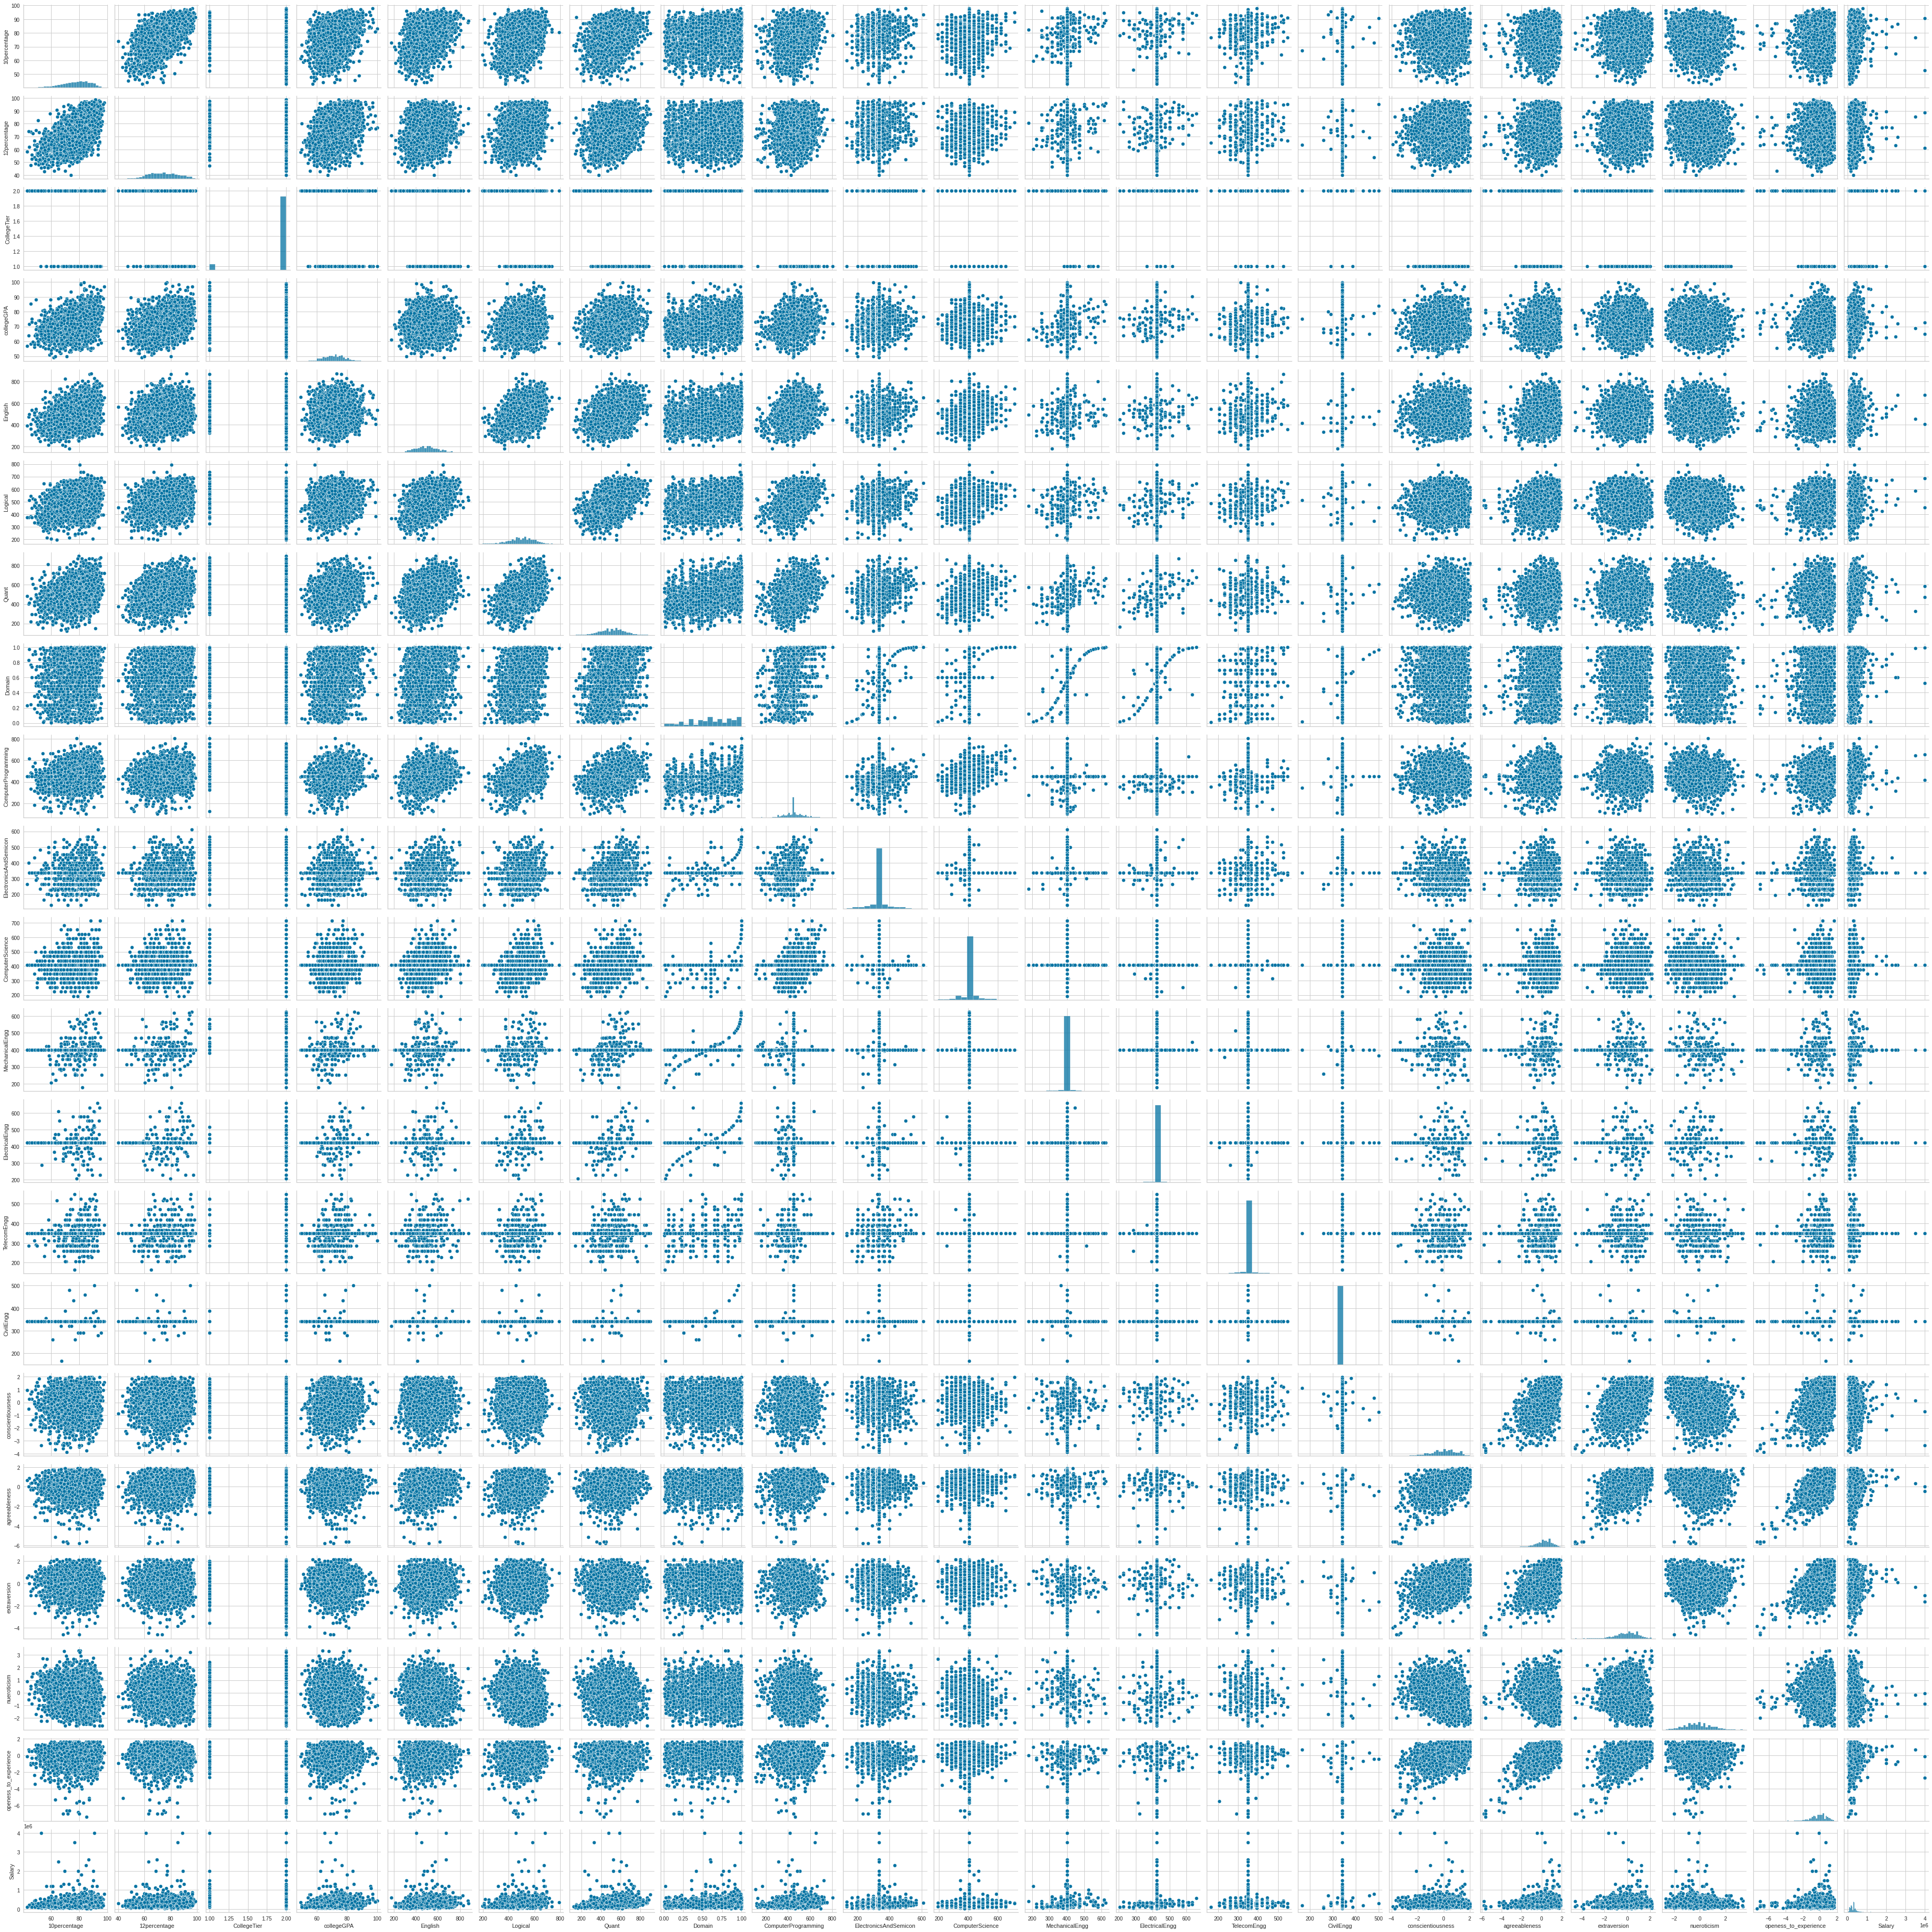

In [85]:
# pair plot gives plot between every column with every other column
sns.pairplot(data) 

#**Data Preprocessing**

In [87]:
for col in data.columns:
  if data[col].dtype == 'object':
    print(col)

Gender
Degree
Specialization


In [88]:
# label en coding categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data.Gender = le.fit_transform(data.Gender)
data.Degree = le.fit_transform(data.Degree)
data.Specialization = le.fit_transform(data.Specialization)

df.head()

Gender  10percentage  12percentage  CollegeTier       Degree  \
0      f         87.80         84.00            1  B.Tech/B.E.   
1      m         57.00         64.50            2  B.Tech/B.E.   
2      m         77.33         85.17            2  B.Tech/B.E.   
3      m         84.30         86.00            1  B.Tech/B.E.   
4      f         82.00         75.00            2  B.Tech/B.E.   

                            Specialization  collegeGPA  English  Logical  \
0  instrumentation and control engineering       73.82      650      665   
1           computer science & engineering       65.00      440      435   
2         electronics & telecommunications       61.94      485      475   
3           computer science & engineering       80.40      675      620   
4                            biotechnology       64.30      575      495   

   Quant  ...  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0    810  ...              -1              -1           -1         -1   
1    210  ...              -1              -1           -1         -1   
2    505  ...              -1              -1          260         -1   
3    635  ...              -1              -1           -1         -1   
4    365  ...              -1              -1           -1         -1   

   conscientiousness  agreeableness  extraversion  nueroticism  \
0            -0.1590         0.3789        1.2396      0.14590   
1             1.1336         0.0459        1.2396      0.52620   
2             0.5100        -0.1232        1.5428     -0.29020   
3            -0.4463         0.2124        0.3174      0.27270   
4            -1.4992        -0.7473       -1.0697      0.06223   

   openess_to_experience  Salary  
0                 0.2889  445000  
1                -0.2859  110000  
2                -0.2875  255000  
3                 0.4805  420000  
4                 0.1864  200000  

[5 rows x 24 columns]

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [91]:
X = data.drop('Salary', axis = 1)
y = data['Salary']

In [92]:
# The setup function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. 
# setup must be called before executing any other function in pycaret. 
# It takes two mandatory parameters: a pandas dataframe and the name of the target column.
regression.setup(X,target=y)

##**source:** https://towardsdatascience.com/introduction-to-regression-in-python-with-pycaret-d6150b540fc4

**session_id**: A pseudo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

**Original Data**: Displays the original shape of the dataset. For this experiment, (5400, 8) means 5400 samples and 8 features including the target column.

**Missing Values**: When there are missing values in the original data, this will show as True. For this experiment, there are no missing values in the dataset.

**Numeric Features**: Number of features inferred as numeric. In this dataset, 1 out of 8 features is inferred as numeric.

**Categorical Features**: Number of features inferred as categorical. In this dataset, 6 out of 8 features are inferred as categorical.

**Transformed Train Set**: Displays the shape of the transformed training set. 

**Transformed Test Set**: Displays the shape of the transformed test/hold-out set.

In [93]:
regression.compare_models()

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Ridge(random_state=1974)

**MAE:** Mean Absolute Error - should be less

**MSE:** Mean Squared Error - should be less

**RMSE:** Root Mean Squared Error - should be less

**RMSLE:** Root Mean Squared Logarithmic Error (Root Mean Squared Logarithmic Error is calculated by applying log to the actual and the predicted values and then taking their differences, https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a)

**MAPE:** Mean Absolute Percentage - should be less

**R2 score:** - should be between 0.10 and 0.50

In [95]:
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,random_state=1974)

In [169]:
from sklearn.linear_model import HuberRegressor, Ridge
h = HuberRegressor()
r = Ridge(alpha = 0.01)

# comparing Ridge and Huber regression according to table

In [170]:
r.fit(X_train, y_train)
h.fit(X_train, y_train)

HuberRegressor()

In [171]:
p1 = r.predict(X_test)
p2 = h.predict(X_test)

In [172]:
r_score = r.score(X_test, y_test)
h_score = h.score(X_test, y_test)

In [173]:
r_score 

0.11130201711905985

In [175]:
h_score

0.09526159557588132

In [176]:
data.drop('Salary', axis = 1).columns

Index(['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [187]:
np.array(data.iloc[1])

array([ 1.00000000e+00,  5.70000000e+01,  6.45000000e+01,  2.00000000e+00,
        0.00000000e+00,  5.00000000e+00,  6.50000000e+01,  4.40000000e+02,
        4.35000000e+02,  2.10000000e+02,  3.42314900e-01,  3.65000000e+02,
        3.35947917e+02,  4.06720630e+02,  4.01174863e+02,  4.23336066e+02,
        3.49879562e+02,  3.41960000e+02,  1.13360000e+00,  4.59000000e-02,
        1.23960000e+00,  5.26200000e-01, -2.85900000e-01,  1.10000000e+05])

In [199]:
temp = np.asarray(( [ 1.00000000e+00,  5.70000000e+01,  6.45000000e+01,  2.00000000e+00,
        0.00000000e+00,  5.00000000e+00,  6.50000000e+01,  4.40000000e+02,
        4.35000000e+02,  2.10000000e+02,  3.42314900e-01,  3.65000000e+02,
        3.35947917e+02,  4.06720630e+02,  4.01174863e+02,  4.23336066e+02,
        3.49879562e+02,  3.41960000e+02,  1.13360000e+00,  4.59000000e-02,
        1.23960000e+00,  5.26200000e-01, -2.85900000e-01]))
temp = temp.reshape(1, -1)
std_data = sc.transform(temp)
std_data

array([[ 1.00000000e+00,  5.70000000e+01,  6.45000000e+01,
         2.00000000e+00,  8.32017255e-18,  5.00000000e+00,
         6.50000000e+01,  4.40000000e+02,  4.35000000e+02,
         2.10000000e+02,  3.42314900e-01,  3.65000000e+02,
         3.35947917e+02,  4.06720630e+02,  4.01174863e+02,
         4.23336066e+02,  3.49879562e+02,  3.41960000e+02,
         1.13360000e+00,  4.59000000e-02,  1.23960000e+00,
         5.26200000e-01, -2.85900000e-01]])

In [200]:
r.predict(std_data)

array([6086779.63054871])